C:\Users\aleja\AppData\Local\Temp\ipykernel_15368\1431374527.py:86: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


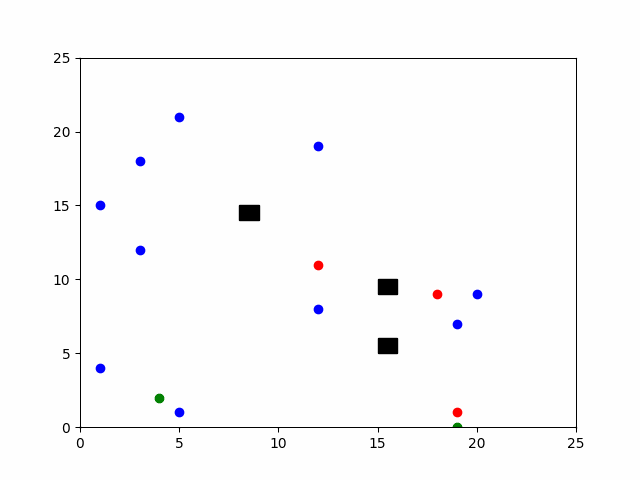

In [6]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import imageio
import os
from IPython.display import display, Image

# Definición de clases
class Agent:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def move(self):
        self.x += random.randint(-1, 1)
        self.y += random.randint(-1, 1)

class Prey(Agent):
    def __init__(self, x, y):
        super().__init__(x, y)

class Predator(Agent):
    def __init__(self, x, y):
        super().__init__(x, y)

class Hunter(Predator):
    def chase(self, prey):
        if prey.x > self.x:
            self.x += 1
        elif prey.x < self.x:
            self.x -= 1

        if prey.y > self.y:
            self.y += 1
        elif prey.y < self.y:
            self.y -= 1

class Ambusher(Predator):
    def ambush(self, prey):
        if abs(prey.x - self.x) < 3 and abs(prey.y - self.y) < 3:
            self.x = prey.x
            self.y = prey.y

# Crear agentes y obstáculos
preys = [Prey(random.randint(0, 20), random.randint(0, 20)) for _ in range(10)]
hunters = [Hunter(random.randint(0, 20), random.randint(0, 20)) for _ in range(3)]
ambushers = [Ambusher(random.randint(0, 20), random.randint(0, 20)) for _ in range(2)]
obstacles = [(random.randint(5, 15), random.randint(5, 15)) for _ in range(3)]

filenames = []  # Lista para guardar los nombres de los archivos de las imágenes

# Simulación
for i in range(100):
    fig, ax = plt.subplots()
    for p in preys:
        p.move()
        plt.scatter(p.x, p.y, color='blue')

    for h in hunters:
        prey = random.choice(preys)
        h.chase(prey)
        plt.scatter(h.x, h.y, color='red')

    for a in ambushers:
        prey = random.choice(preys)
        a.ambush(prey)
        plt.scatter(a.x, a.y, color='green')

    for ox, oy in obstacles:
        rect = patches.Rectangle((ox, oy), 1, 1, linewidth=1, edgecolor='black', facecolor='black')
        ax.add_patch(rect)

    plt.xlim(0, 25)
    plt.ylim(0, 25)

    # Guardar imagen
    filename = f'frame_{i}.png'
    plt.savefig(filename)
    filenames.append(filename)

    plt.close()

# Crear GIF
with imageio.get_writer('simulation.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        os.remove(filename)

display(Image(filename="simulation.gif"))


1. ¿Qué comportamientos puede observar en los depredadores?
2. ¿Cómo mejoraría este modelo?

In [27]:
import random
import matplotlib.pyplot as plt
import imageio

class Vehicle:
    def __init__(self, pos, speed, lane):
        self.pos = pos
        self.speed = speed
        self.lane = lane

    def move(self):
        self.pos += self.speed

class AggressiveVehicle(Vehicle):
    def is_safe_to_change(self, target_lane, vehicles):
        for vehicle in vehicles:
            if vehicle.lane == target_lane and abs(vehicle.pos - self.pos) < 10:
                return False
        return True

    def change_lane(self, lanes, vehicles):
        if random.random() < 0.2:
            target_lane = 1 - self.lane  # Switch between 0 and 1
            
            if self.is_safe_to_change(target_lane, vehicles):
                self.lane = target_lane

class CautiousVehicle(Vehicle):
    def keep_distance(self, vehicles):
        for vehicle in vehicles:
            if vehicle.lane == self.lane and vehicle.pos > self.pos:
                self.speed = min(self.speed, vehicle.speed - 0.1)

def simulate_traffic(num_steps, num_vehicles):
    lanes = [0, 1]
    vehicles = [random.choice([AggressiveVehicle, CautiousVehicle])(random.randint(0, 50), random.uniform(1, 2), random.choice(lanes)) for _ in range(num_vehicles)]

    filenames = []

    for step in range(num_steps):
        plt.figure(figsize=(12, 2))

        for vehicle in vehicles:
            vehicle.move()

            if isinstance(vehicle, AggressiveVehicle):
                vehicle.change_lane(lanes, vehicles)

            if isinstance(vehicle, CautiousVehicle):
                vehicle.keep_distance(vehicles)

            plt.scatter(vehicle.pos, vehicle.lane, c='r' if isinstance(vehicle, AggressiveVehicle) else 'b', s=50)

        plt.xlim(0, 100)
        plt.ylim(-1, len(lanes))

        filename = f'frame_{step}.png'
        plt.savefig(filename)
        filenames.append(filename)

        plt.close()

    with imageio.get_writer('traffic_simulation.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
            os.remove(filename)



C:\Users\aleja\AppData\Local\Temp\ipykernel_15368\743649018.py:68: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


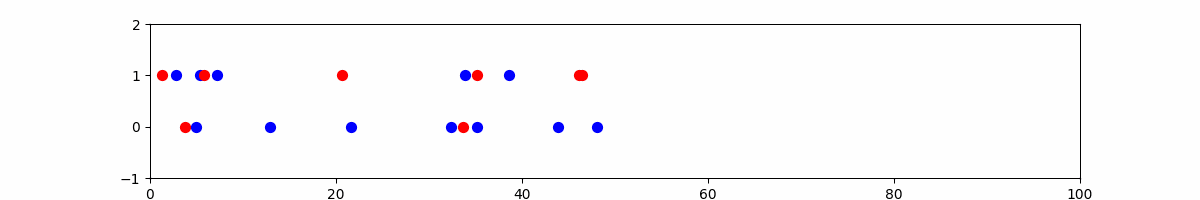

In [29]:
simulate_traffic(50, 20)
display(Image(filename="traffic_simulation.gif"))